In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px
import warnings
from six.moves import urllib
warnings.filterwarnings('ignore')

#%matplotlib inline

In [4]:
download_dir="./data/"
download_url= "https://raw.githubusercontent.com/manishkr1754/CarDekho_Used_Car_Price_Prediction/main/notebooks/data/cardekho_dataset.csv"
os.makedirs(download_dir, exist_ok=True)
filename=os.path.basename(download_url)
download_file_path=os.path.join(download_dir, filename)
urllib.request.urlretrieve(download_url, download_file_path)
print(filename,'Downloaded at',download_file_path)
df=pd.read_csv(download_file_path)
print(df.head())


cardekho_dataset.csv Downloaded at ./data/cardekho_dataset.csv
   Unnamed: 0       car_name    brand     model  vehicle_age  km_driven  \
0           0    Maruti Alto   Maruti      Alto            9     120000   
1           1  Hyundai Grand  Hyundai     Grand            5      20000   
2           2    Hyundai i20  Hyundai       i20           11      60000   
3           3    Maruti Alto   Maruti      Alto            9      37000   
4           4  Ford Ecosport     Ford  Ecosport            6      30000   

  seller_type fuel_type transmission_type  mileage  engine  max_power  seats  \
0  Individual    Petrol            Manual    19.70     796      46.30      5   
1  Individual    Petrol            Manual    18.90    1197      82.00      5   
2  Individual    Petrol            Manual    17.00    1197      80.00      5   
3  Individual    Petrol            Manual    20.92     998      67.10      5   
4      Dealer    Diesel            Manual    22.77    1498      98.59      5   

   se

In [5]:
df.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.5+ MB


In [17]:
num_features=[feature for feature in df.columns if df[feature].dtypes!='O']
cat_features=[feature for feature in df.columns if df[feature].dtypes=='O']

print('We have {} numericals features :{}'.format(len(num_features),num_features))
print('\nWe have {} categorical features :{}'.format(len(cat_features),cat_features))

We have 7 numericals features :['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']

We have 6 categorical features :['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']


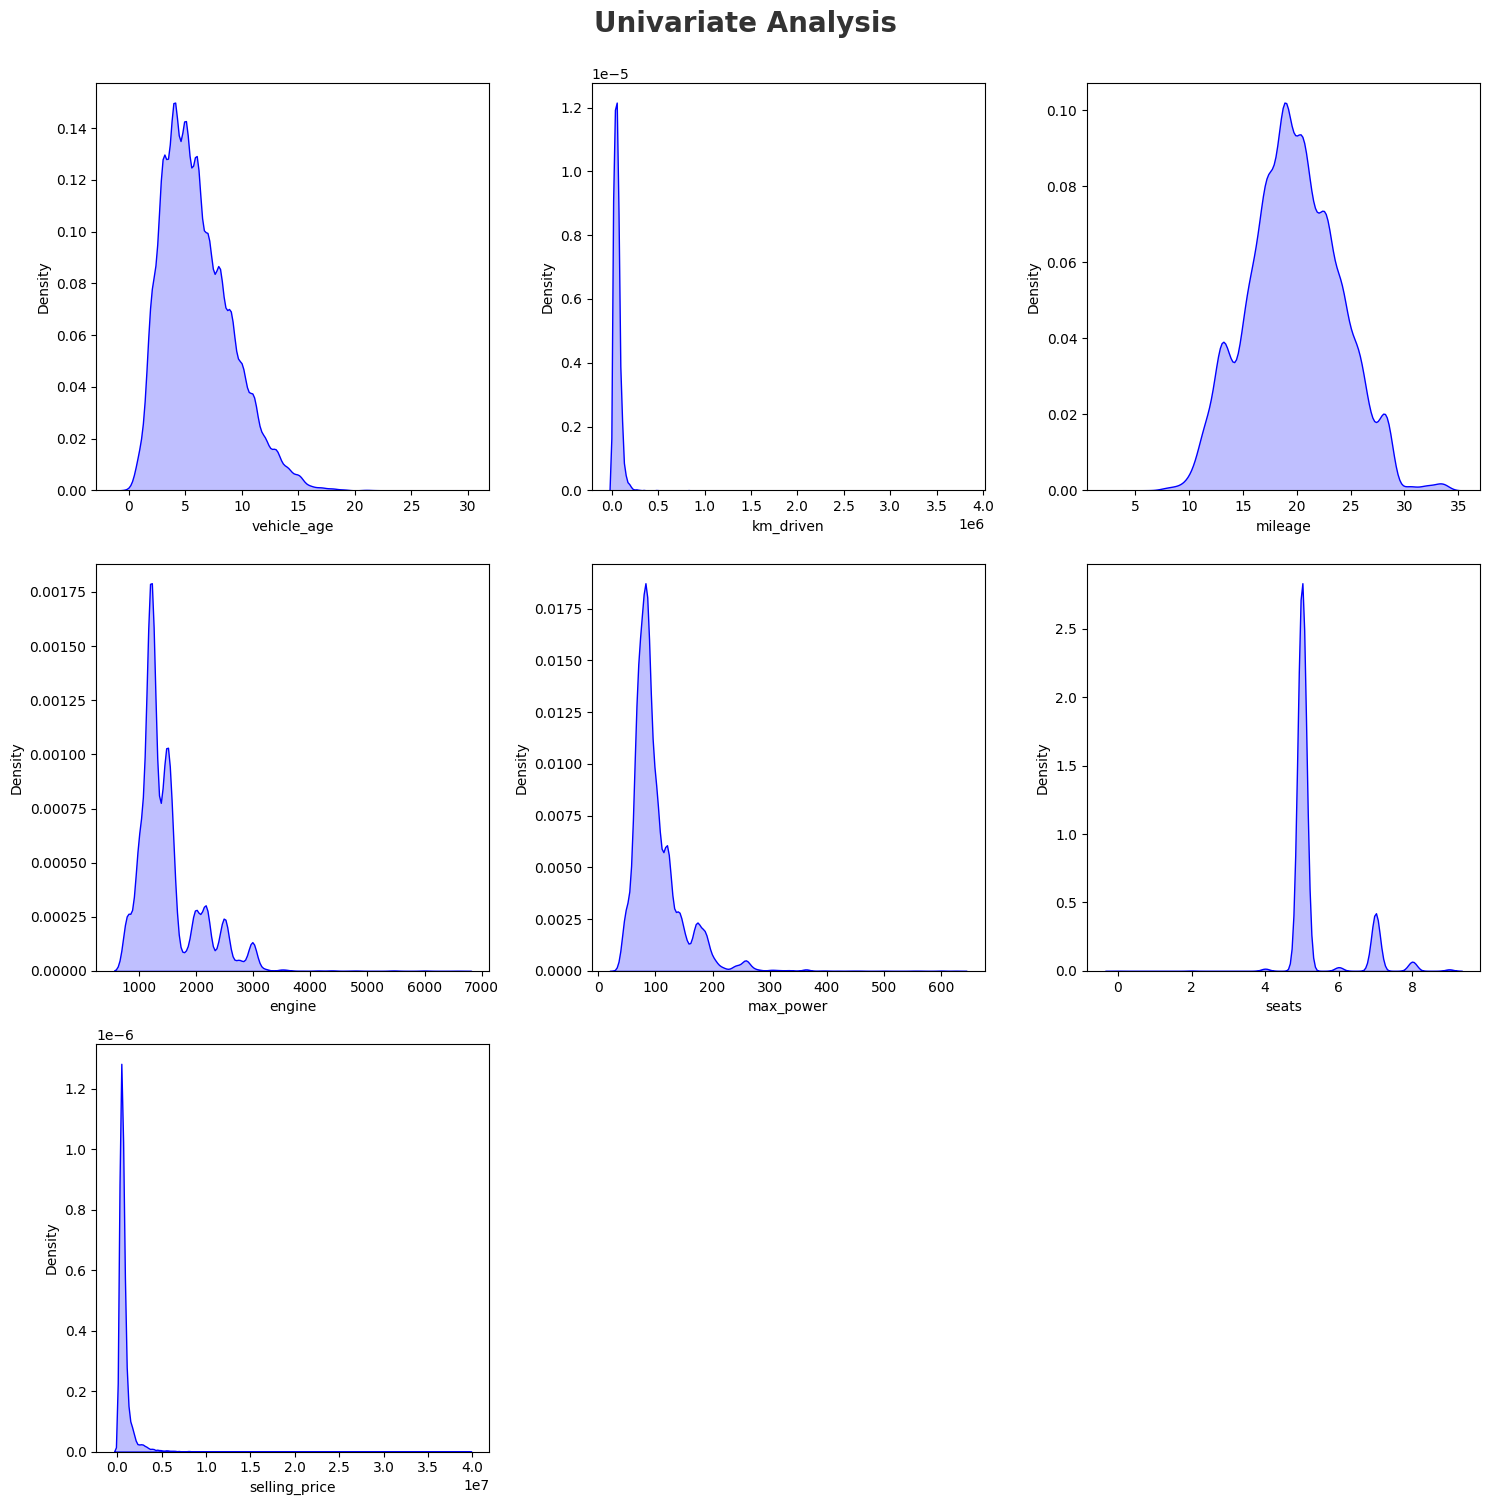

In [18]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis', fontsize=20,fontweight='bold',alpha=0.8,y=1.0)
for i in range(0,len(num_features)):
  plt.subplot(3,3,i+1)
  sns.kdeplot(x=df[num_features[i]],shade=True, color='b')
  plt.tight_layout()

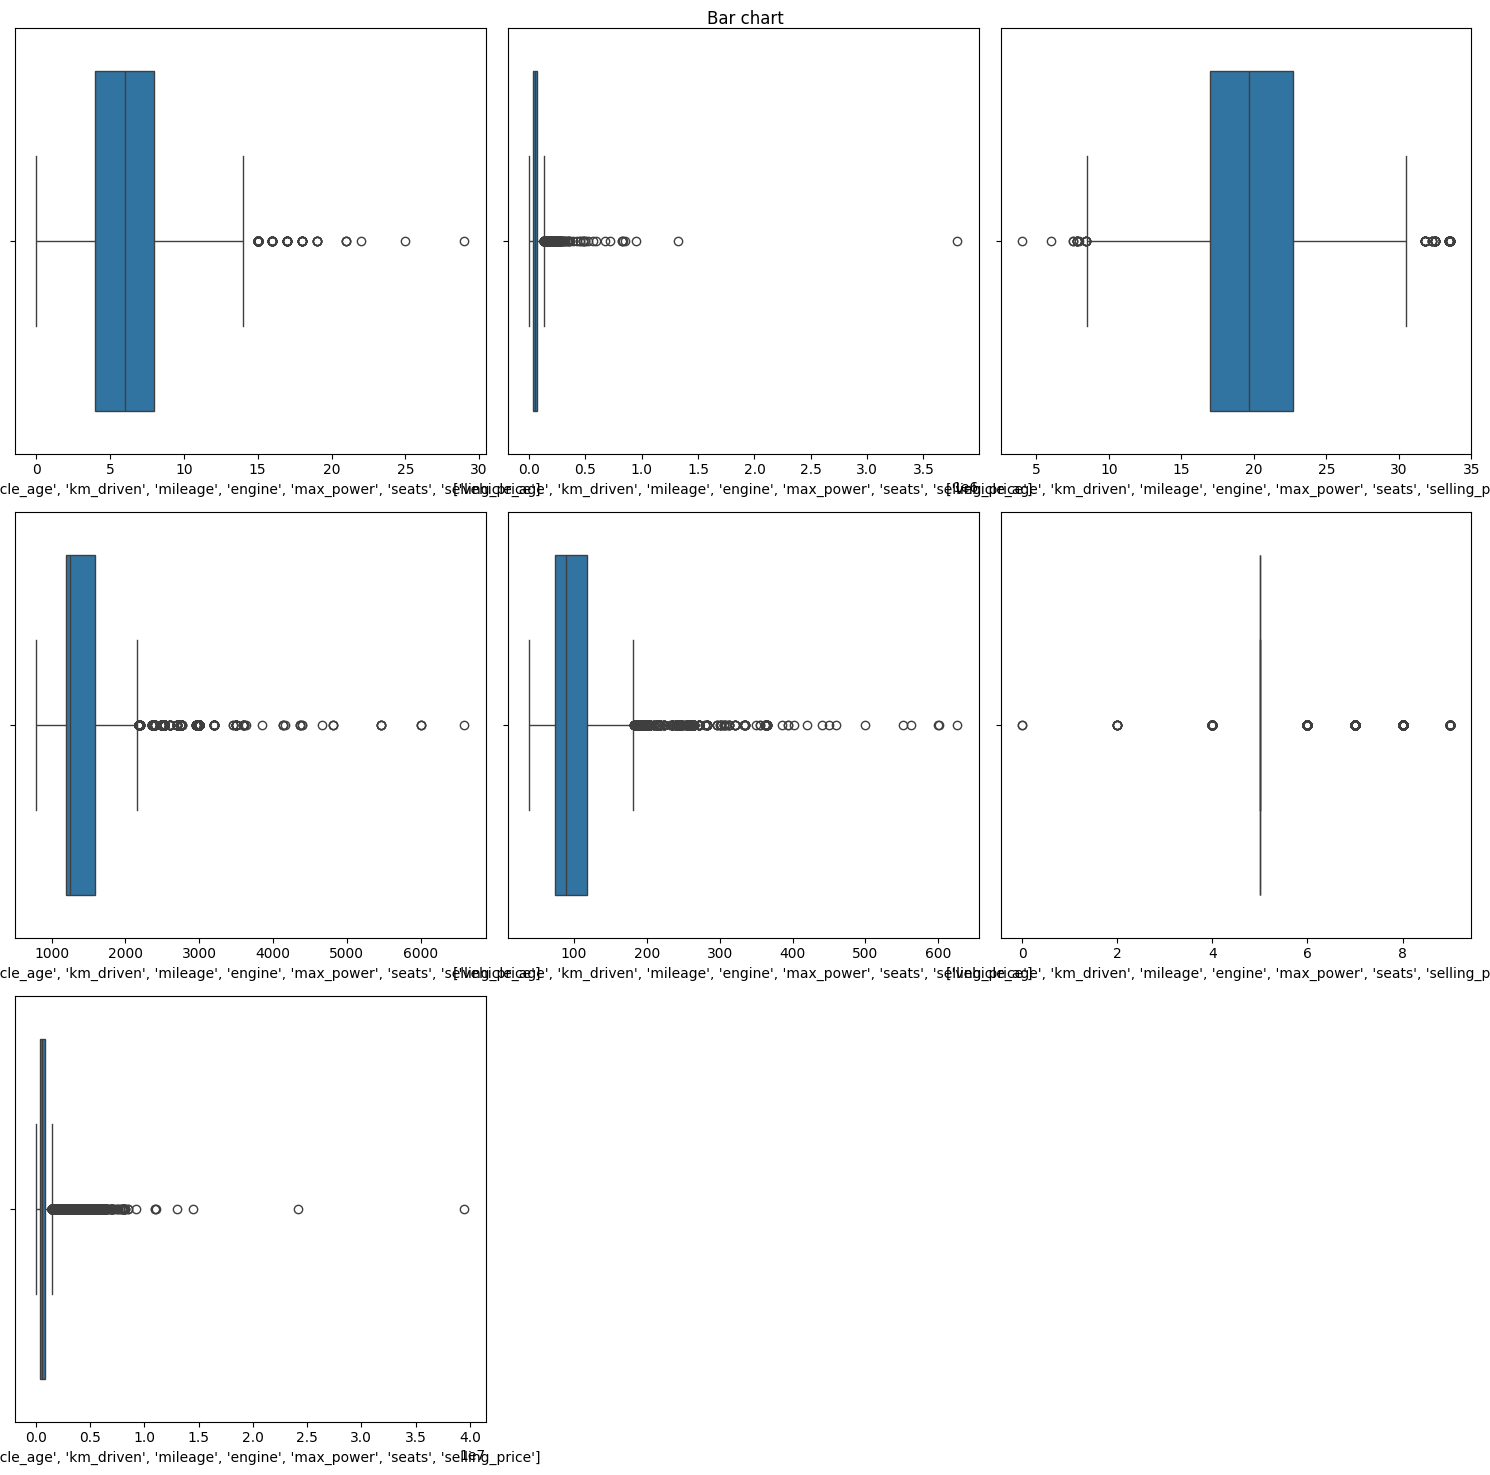

In [22]:
plt.figure(figsize=(15,15))
plt.suptitle('Bar chart')
for i in range(0,len(num_features)):
  plt.subplot(3,3,i+1)
  sns.boxplot(x=df[num_features[i]])
  plt.xlabel(num_features)
  plt.tight_layout()